***Local Outlier Factor***

**Creamos una base ficticia en donde se tiene dos variables Edad e Ingreso**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n = 100

# Edad realista entre 18 y 65
edad = np.random.randint(18, 66, n)

# Ingreso depende de la edad con ruido
ingreso = []

for e in edad:
    if e <= 25:
        ingreso.append(np.random.normal(loc=1200, scale=300))  # jóvenes
    elif e <= 40:
        ingreso.append(np.random.normal(loc=2500 + (e - 25) * 50, scale=400))  # crecimiento
    elif e <= 55:
        ingreso.append(np.random.normal(loc=4000 + (e - 40) * 30, scale=500))  # senior
    else:
        ingreso.append(np.random.normal(loc=4500, scale=400))  # posible descenso/jubilación

# Agregar outlier
edad = np.append(edad, 23)
ingreso.append(8000)  # usar append para lista

# Crear DataFrame
df_real = pd.DataFrame({'Edad': edad, 'Ingreso': np.round(ingreso, 2)})

# Ver muestra
print(df_real.head())




   Edad  Ingreso
0    56  4732.85
1    46  4623.87
2    32  3207.73
3    60  4802.00
4    25  1137.85


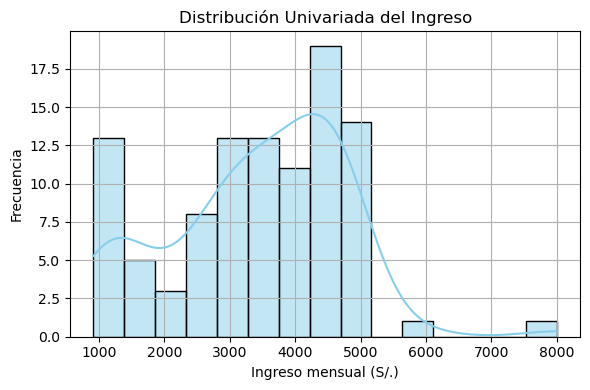

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(df_real['Ingreso'], bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución Univariada del Ingreso')
plt.xlabel('Ingreso mensual (S/.)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

*Observamos que hay dos outliers en la variable Ingreso Mensual, en otros casos no se puede visualizar el outlier*

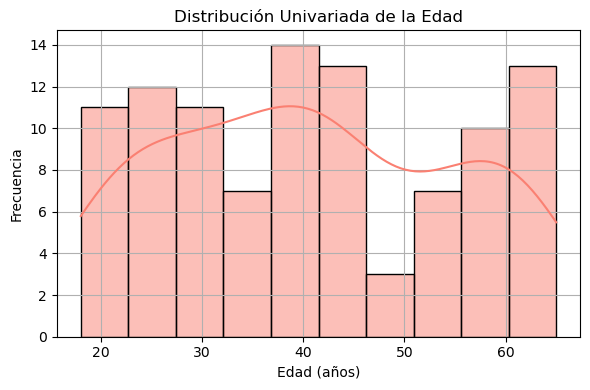

In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(df_real['Edad'], bins=10, kde=True, color='salmon', edgecolor='black')
plt.title('Distribución Univariada de la Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

*Para la variable edad  no se observa outliers*

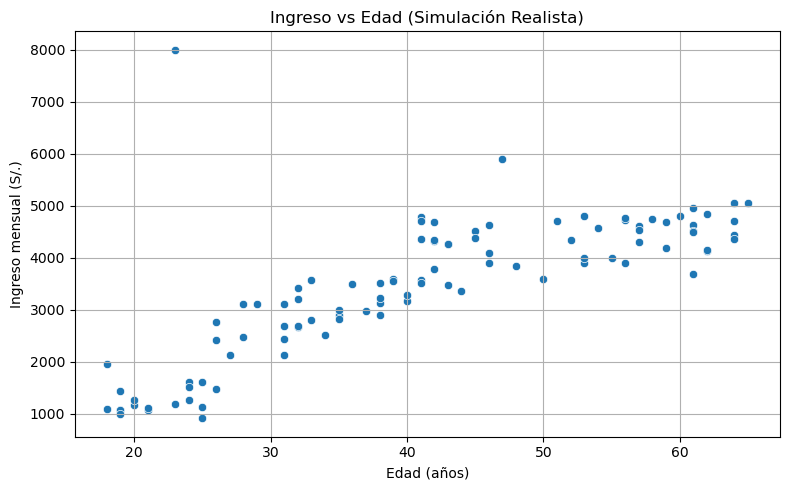

In [26]:
# Graficar
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_real, x='Edad', y='Ingreso')
plt.title('Ingreso vs Edad (Simulación Realista)')
plt.xlabel('Edad (años)')
plt.ylabel('Ingreso mensual (S/.)')
plt.grid(True)
plt.tight_layout()
plt.show()

*Lo interesante es que si graficamos de manera bivariada se observa claramente los outiers*

***Algoritmo LOF***
*Toma el centro de cada uno de los puntos y va a nalizar a su alrededor, analiza cuantos puntos hay en su vencindad, esta técnica se basa en su vecindad.*
*El LOF da una puntuación que va de negativo a positivo y se dice que puntuaciones < -1 son outliers*

# Detección de Outliers Basada en Densidad

- **Outliers locales**: Son valores atípicos en comparación con sus vecindarios locales, en lugar de la distribución global de los datos.
- En la figura, **o₁** y **o₂** son outliers locales respecto al grupo **C₁**; **o₃** es un outlier global, pero **o₄** no lo es.  
  Sin embargo, los métodos de clustering basados en proximidad no pueden detectar que **o₁** y **o₂** son outliers (por ejemplo, comparándolos con **o₄**).

---

###  Intuición (detección basada en densidad)
La densidad alrededor de un objeto **outlier** es **significativamente diferente** de la densidad alrededor de sus vecinos.

---

###  Método
Se usa la **densidad relativa** de un objeto respecto a sus vecinos como indicador del grado en que un objeto es considerado un outlier.

---

###  Definiciones

- **k-distancia** de un objeto *o*, `distₖ(o)`:  
  Distancia entre *o* y su *k-ésimo* vecino más cercano.

- **Vecindario k-distancia** de *o*, `Nₖ(o)` = { *o′* | *o′* en *D*, `dist(o, o′) ≤ distₖ(o)` }

  >  `Nₖ(o)` puede tener más de *k* elementos, ya que múltiples objetos pueden tener una distancia idéntica a *o*.

---

###  Ilustración

![Detección basada en densidad](LOF_1.jpg)

# Factor de Outlier Local: LOF

- **Distancia de alcanzabilidad** desde *o′* hacia *o*:

  $$
  reachdist_k(o \leftarrow o') = \max \left\{ dist_k(o),\ dist(o, o') \right\}
  $$

  > Donde *k* es un parámetro definido por el usuario.

- **Densidad de alcanzabilidad local** de *o*:

  $$
  lrd_k(o) = \frac{||N_k(o)||}{\sum_{o' \in N_k(o)} reachdist_k(o' \leftarrow o)}
  $$

---

###

- **LOF (Local Outlier Factor)** de un objeto *o* es el **promedio del cociente** entre la densidad de alcanzabilidad local de los *k vecinos más cercanos* de *o* y la densidad local de *o*:

  $$
  LOF_k(o) = \frac{1}{||N_k(o)||} \sum_{o' \in N_k(o)} \frac{lrd_k(o')}{lrd_k(o)}
  $$

---

### 

- Cuanto **más baja** sea la densidad de alcanzabilidad local de *o*, y **más alta** la densidad local de sus vecinos *kNN*, **mayor** será el **LOF**.

- Esto permite detectar outliers locales cuya **densidad es baja** en comparación con la de sus vecinos más cercanos.

---

###

![LOF Ejemplo](LOF_2.jpg)

**Resumen**

- *Primer caso : Dado cierta cantidad de vecinos quiero encontrar cuanto debo extender el radio*

- *Segundo caso : Dado cierto nivel de radio cuantos puntos caen en esa área*

- *El algoritmo pondrá un score de outlier dependiendo cual es el que tiene menos densidad en ese mismo radio*

- *Se fija cierto radio o cierta cantidad de vecinos para el algoritmo*

- *Usualmente se fija 50 vecinos para muestras relativamentes grande 5000 aprox, tambien se puede probar la cantidad de vecinos y registrar , en donde hay un punto de inlfexion se podría tomar como óptimo*

- *Si se toma mucha cantidad de vecinos, los circulos seran muy grandes y se van a parecer entonces puede que no encuentre outliers*

- *Si se toma poca cantidad de vecinos, se exagera en la escala y los circulos seran diferentes entre si por lo tanto se sobreestima los outliers me mostrará muchos outliers, lo hago mas sensible*
